### EDA

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.diagnostic import linear_harvey_collier
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import pacf
from sklearn.preprocessing import MinMaxScaler
import statsmodels
plt.style.use('ggplot')

pd.options.display.max_columns = None  # display all columns when I print a dataframe
pd.options.display.max_seq_items = 5000 # display larger numbers of rows in pandas when I print out a Series or Index
pd.options.display.max_rows = 5000

In [2]:
from sklearn import datasets
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000 dollars
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2, where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- target: Median value of owner-occupied homes in 1000 dollars

In [32]:
df.shape

(506, 14)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [36]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Univariate Analysis

### Outlier Analysis

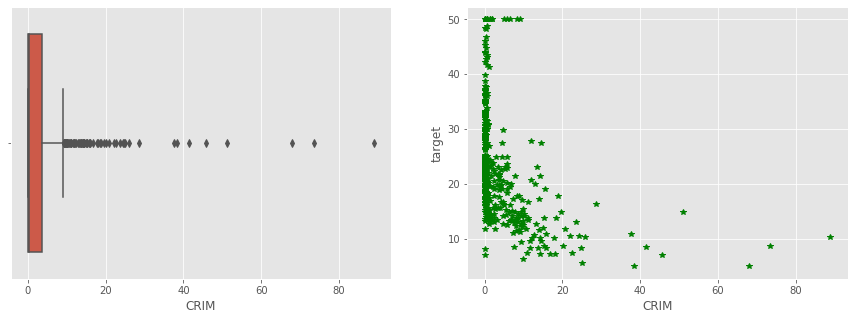

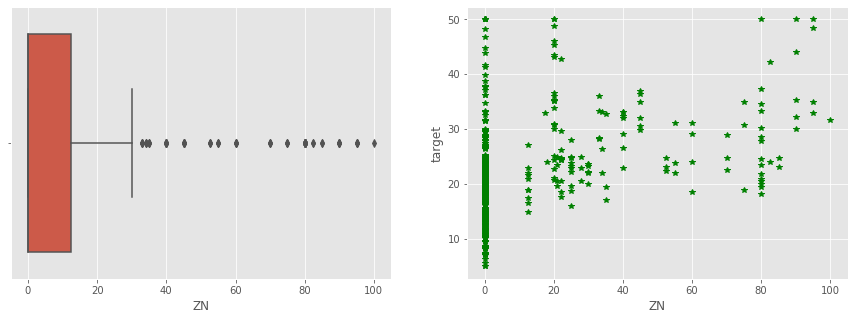

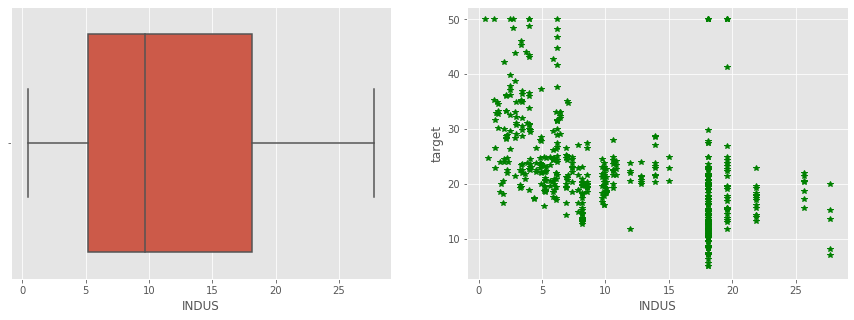

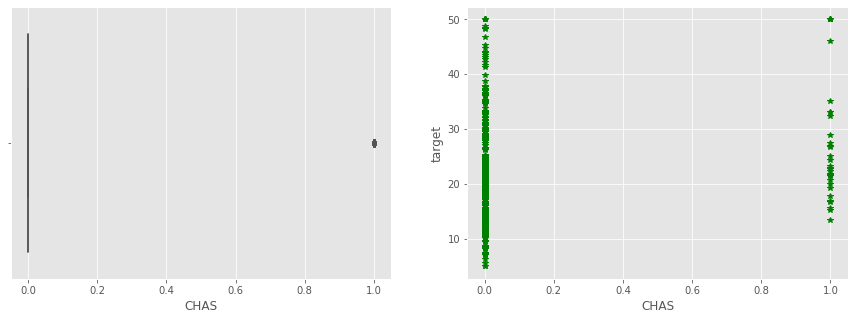

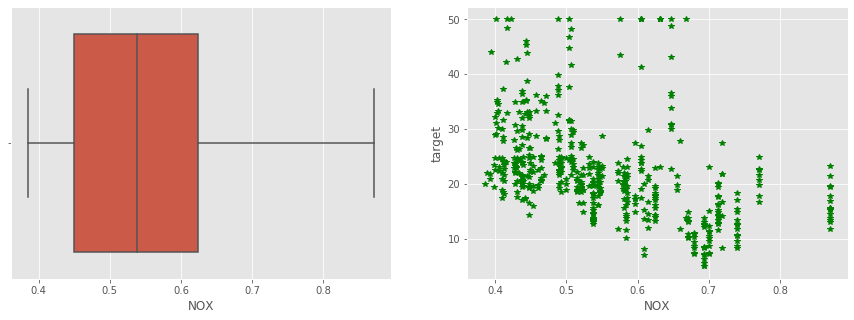

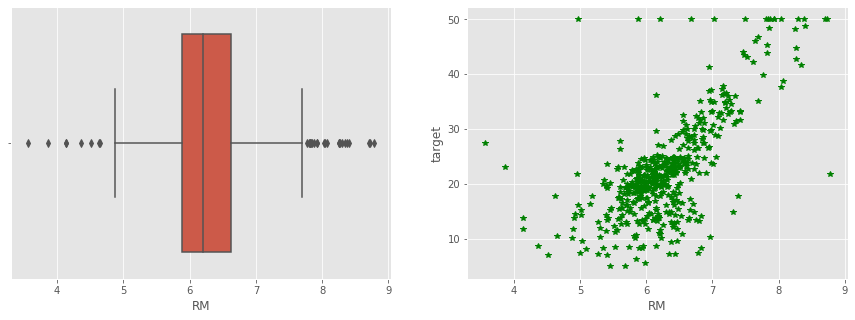

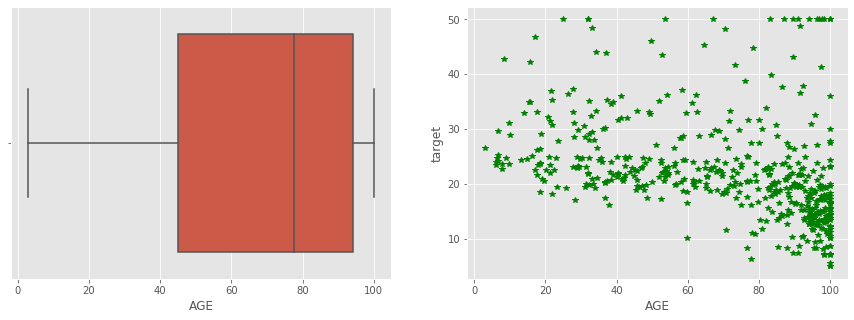

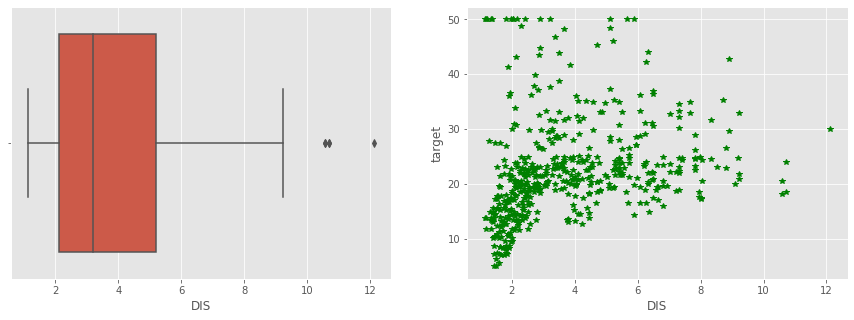

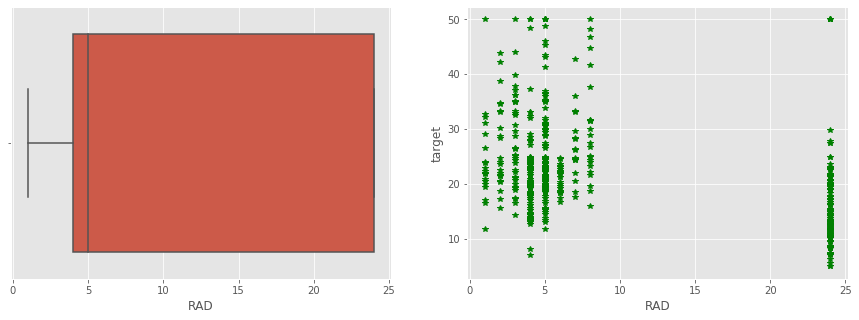

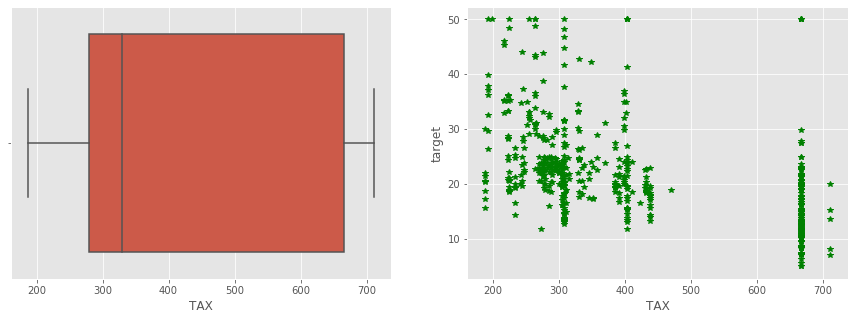

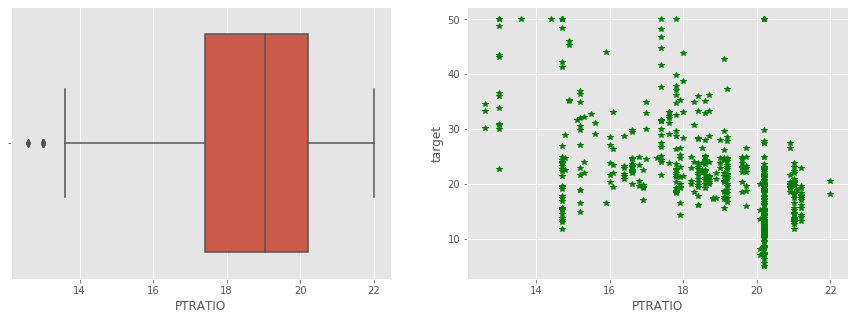

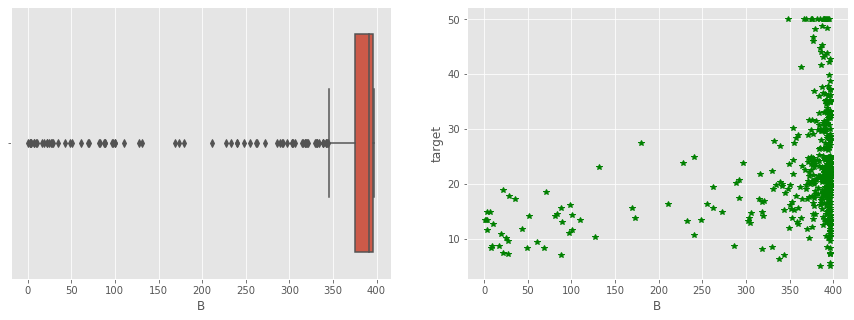

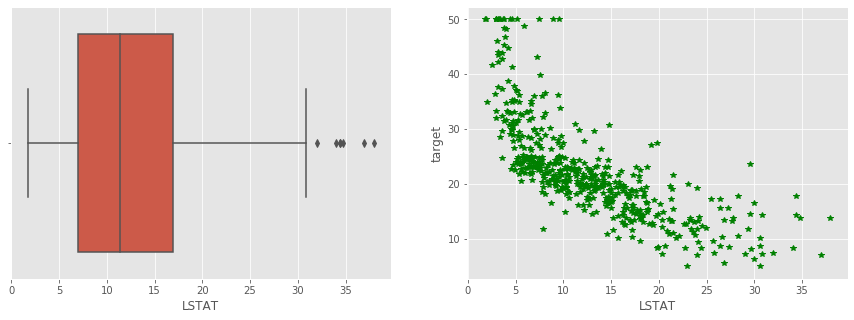

In [31]:
response = 'target'
features = boston_data.feature_names
for feat in features:
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    sns.boxplot(df[feat])
    plt.subplot(1,2,2)
    plt.plot(df[feat], df[response], 'g*')
    plt.xlabel(feat)
    plt.ylabel(response)
    plt.show()

### Bi-variate Analysis 

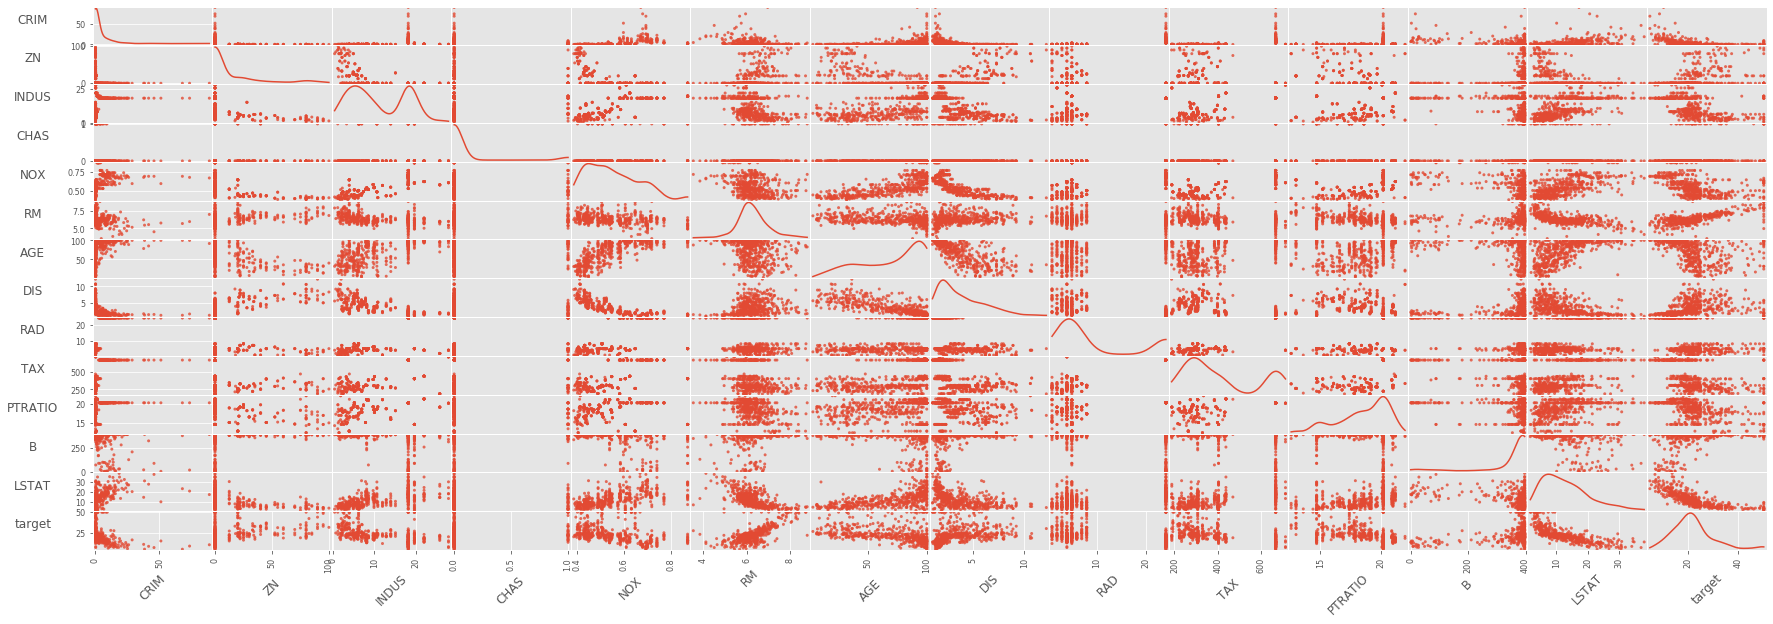

In [68]:
smp = pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(30, 10), diagonal='kde')
[s.xaxis.label.set_rotation(45) for s in smp.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in smp.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.5,0.5) for s in smp.reshape(-1)]
plt.show()

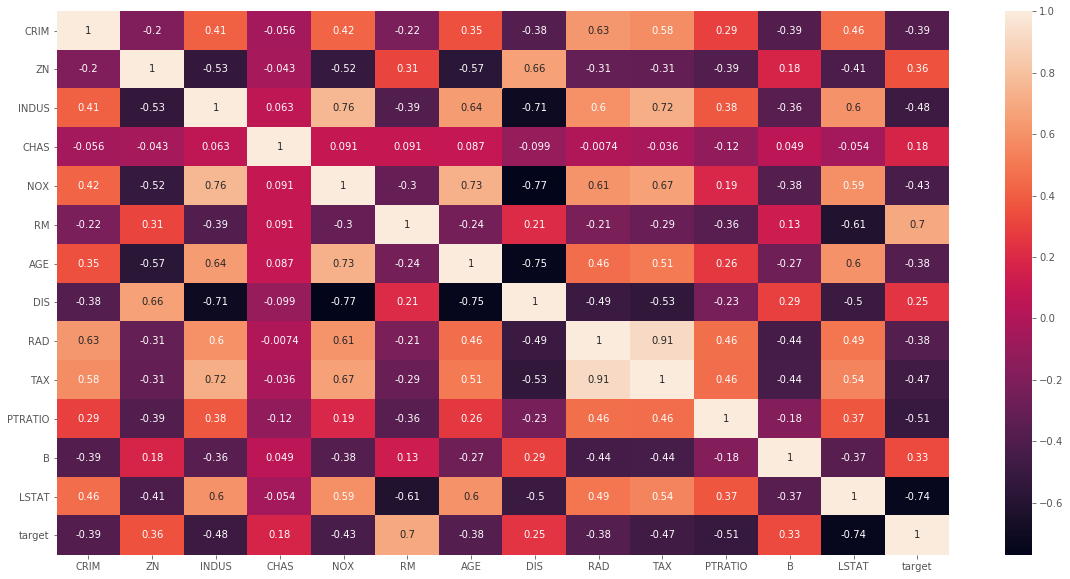

In [61]:
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(), annot=True)

### Null values

# of Null values: 0


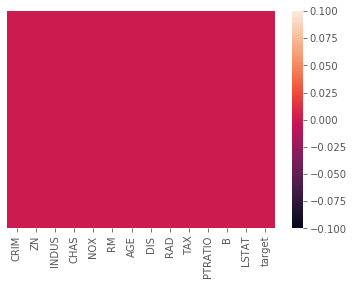

In [62]:
print(f'# of Null values: {sum(df.isnull().any(axis=1))}')
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)

### Duplicate values

In [63]:
sum(df.duplicated())

0

### Training with Linear regession


#### Scaling 

In [26]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_df, columns=features)
scaled_df = pd.concat([scaled_df, df['target']], axis = 1)
scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


#### Statsmodel

In [27]:
train_data = scaled_df.iloc[0:int(np.floor(0.7*len(scaled_df)))]
test_data = scaled_df.iloc[int(np.floor(0.7*len(scaled_df))):]

X_train = train_data[features].copy()
Y_train = train_data['target'].copy()
X_test = test_data[features].copy()
Y_test = test_data['target'].copy()

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(Y_train, X_train).fit()
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print(model.summary())

1.4171649480797897
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 08 Apr 2020   Prob (F-statistic):          1.03e-143
Time:                        09:06:00   Log-Likelihood:                -891.12
No. Observations:                 354   AIC:                             1810.
Df Residuals:                     340   BIC:                             1864.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8443      2.567 

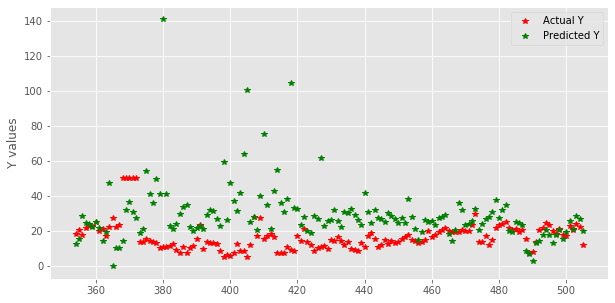

In [40]:
plt.figure(figsize=(10,5))
plt.plot(Y_test, 'r*',label='Actual Y')
plt.plot(Y_test_pred, 'g*', label='Predicted Y')
plt.ylabel('Y values')
plt.legend()

#### Residual analysis

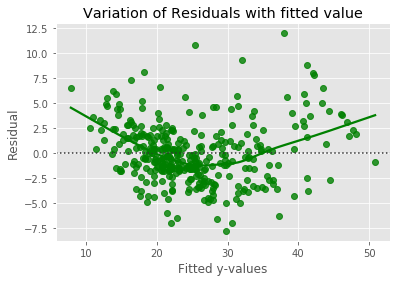

some problem


In [49]:
fig, ax1 = plt.subplots()
sns.residplot(Y_train_pred, Y_train, data = X_train, lowess=True, color="g", ax=ax1)
ax1.set_ylabel('Residual')
ax1.set_xlabel('Fitted y-values')
ax1.set_title('Variation of Residuals with fitted value')
plt.show()

p_val_linearity = None
try:
    t_value_linearity, p_val_linearity = linear_harvey_collier(model) 
    print(f'p-value of null hypothesis (regression is correctly modeled as linear): {p_val_linearity}')
except:
    print('some problem')

#### Assumption of Linearily and Additivity:

- Violations of linearity or additivity: if you fit a linear model to data which are **nonlinearly** or **nonadditively** related, your predictions are likely to be seriously in error, especially when you extrapolate beyond the range of the sample data.
- residuals shoud be symmetrically distrbuted along the horizontal line
- Bow-shaped residuals: indicating that the model makes systematic errors whenever it is making unusually large or small predictions. 
- In multiple regression models, nonlinearity or nonadditivity may also be revealed by systematic patterns in plots of the residuals versus individual independent variables. 
- In this plot there is some non-linear behaviour of some predictor that the model is missing completely 

#### Quantitative test for linearity:

- Harvey Collier test for linearity
- The Null hypothesis is that the regression is correctly modeled as linear.
- Here I am getting a nan value not sure what's happening

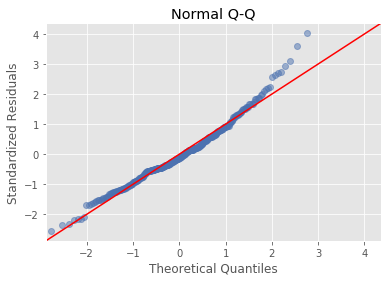

p-value of null hypothesis (residuals are normally distributed): 3.1397053435741866e-05


In [43]:
model_norm_residuals = model.get_influence().resid_studentized_internal
fig, ax2 = plt.subplots()
QQ = ProbPlot(model_norm_residuals)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax2)
ax2.set_title('Normal Q-Q')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Standardized Residuals')
plt.show()

t_value_normality, p_val_normality = statsmodels.stats.diagnostic.normal_ad(model.resid)
print(f'p-value of null hypothesis (residuals are normally distributed): {p_val_normality}')

#### Assumption of Normality:

- shows if the residuals are normally distributed
- You want the residuals to lie on the staright line

#### Quantitative test for normality:

- Anderson-Darling test for normal distribution unknown mean and variance.
- The pvalue for hypothesis that the data comes from a normal distribution with unknown mean and variance.
- Here the p-value is very low and we want it to be above teh significance level of 0.5 and so these residuals fail the normqlity test

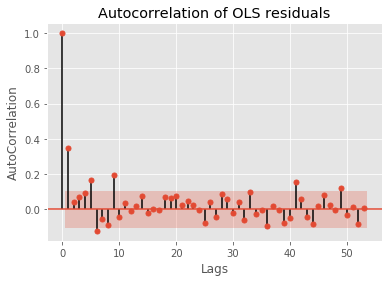

p-value of null hypothesis (no serial correlation for the chosen lag-1): 1.7671545288265495e-11


In [48]:
fig, ax3 = plt.subplots()
plot_pacf(model.resid,lags=53, ax=ax3)
ax3.set_xlabel('Lags')
ax3.set_ylabel('AutoCorrelation')
ax3.set_title('Autocorrelation of OLS residuals')
plt.show()

lm_corr, lm_pvalue_corr, fvalue_corr, f_pvalue_corr = statsmodels.stats.diagnostic.acorr_breusch_godfrey(model,nlags=1)
print(f'p-value of null hypothesis (no serial correlation for the chosen lag-1): {lm_pvalue_corr}')

#### Assumption of Independence:

- show partial correlation in residuals
- Violates the assumption of Linear Regression that residuals are independent 
- Shaded orange plot shows the confidence interval of residuals and any correlation outside is statstically significant 
- we see high correlation at lag 1 

#### Quantitative test for independence:

- Breusch-Godfrey Lagrange Multiplier tests for residual autocorrelation.
- The null hypothesis is that there is no serial correlation of any order up to p (lag mentioned in the equation)
- Here the p-value is very low and we want it to be above teh significance level of 0.5 and so these residuals fail the independece test
- A similar assessment can be also carried out with the Durbin–Watson test and the Ljung–Box test. But DW test has a region where it cannot specify whether residuals are serially correlated or not

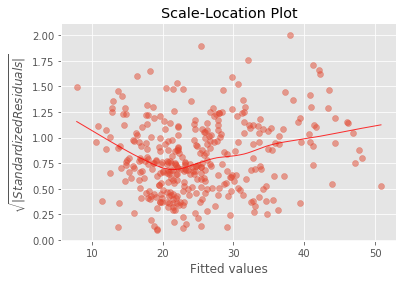

p-value of null hypothesis (no heteroskedasticity): 0.0003060919538844058


In [47]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
fig, ax4 = plt.subplots()
ax4.scatter(Y_train_pred, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(Y_train_pred, model_norm_residuals_abs_sqrt,scatter=False,ci=False,lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax4);
ax4.set_xlabel('Fitted values')
ax4.set_ylabel('$\sqrt{|Standardized Residuals|}$');
plt.title('Scale-Location Plot')
plt.show()

lm_homoske, lm_pvalue_homoske, fvalue_homoske, f_pvalue_homoske = het_breuschpagan(model.resid, model.model.exog)
print(f'p-value of null hypothesis (no heteroskedasticity): {lm_pvalue_homoske}')

#### Assumption of Homoscedasticity:

- shows if residuals are spread along all ranges of the predictors 
- This is how you can check the assumption of equal variance (homoscedasticity)
- You would prefer to see a horizontal line with equally (randomly) spread points
- Here residuals are increasing with fitted values

#### Quantitative test for Homoscedasticity:

- Breusch-Pagan Lagrange Multiplier test for heteroscedasticity
- The tests the hypothesis that the residual variance does not depend on the variables in x in the form

In [54]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

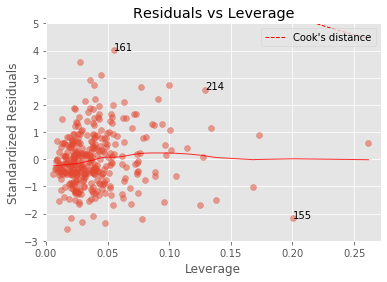

In [55]:
model_leverage = model.get_influence().hat_matrix_diag
model_cooks = model.get_influence().cooks_distance[0]
fig, ax5 = plt.subplots()
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
ax5.set_xlim(0, max(model_leverage)+0.01)
ax5.set_ylim(-3, 5)
ax5.set_title('Residuals vs Leverage')
ax5.set_xlabel('Leverage')
ax5.set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
      ax5.annotate(i,xy=(model_leverage[i],model_norm_residuals[i]));
p = len(model.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
    np.linspace(0.001, max(model_leverage), 50),
    'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
    np.linspace(0.001, max(model_leverage), 50)) # 1 line
ax5.legend(loc='upper right');    

#### Residuals vs Leverage 
- Residuals are in the scale of measuremnets so, error for a GPA with values 0-1 and SAT scores with value 200-800 will have very different ranges of residuals. So we normalize them in many ways
- We can Standardize them or Studentize them [4]
- This plot helps us to find influential cases (i.e., subjects) if any. **Not all outliers are influential** in linear regression analysis (whatever outliers mean). Even though data have extreme values, they might not be influential to determine a regression line. That means, the results wouldn’t be much different if we either include or exclude them from analysis. [1]
- its not neceaasary that only outliers should be influential

#### Scikit Learn

In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
# cross_validate can evaluate multiple metric

# from sklearn.model_selection import cross_validate
# clf 
# cv_results = cross_validate(clf, X, y, cv=3)
# scores = cross_validate(lasso, X, y, cv=3, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

### References

[1] https://data.library.virginia.edu/diagnostic-plots/

[2] http://people.duke.edu/~rnau/testing.htm

[3] https://www.statsmodels.org/stable/index.html

[4]https://online.stat.psu.edu/stat462/node/247/

[5] https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/